In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Conv1D, Add, Flatten, Dropout, Dense, BatchNormalization, Activation
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the data
df = pd.read_csv(r'C:\Users\ASUS\Desktop\ptdl\QuangNinh.csv')
print(df.columns)

# Preprocess the data
df['date'] = pd.to_datetime(df['date'])  # Chuyển đổi cột date thành định dạng thời gian
df.set_index('date', inplace=True)  # Đặt cột date làm index
df = df.loc['2019-03-01':'2024-03-01']  # Chọn phạm vi thời gian cụ thể

# Check for null values and drop them
null_count = df.isnull().sum()
print(null_count)
df = df.dropna()

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['AQI']])

# Prepare data function
def prepare_data(data, timesteps):
    X, y = [], []
    for i in range(len(data) - timesteps):
        X.append(data[i:i + timesteps])
        y.append(data[i + timesteps])
    return np.array(X), np.array(y)

timesteps = 10  # Độ dài của cửa sổ trượt
X, y = prepare_data(scaled_data, timesteps)



# Build the model
input_layer = Input(shape=(timesteps, 1))
x = LSTM(64, return_sequences=True)(input_layer)
x = Conv1D(64, kernel_size=3, padding='same', activation='relu')(x)
x = Conv1D(64, kernel_size=2, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = Conv1D(64, kernel_size=1, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = Conv1D(64, kernel_size=3, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = Conv1D(1, kernel_size=3, padding='same')(x)
x = Add()([x, input_layer])
output_layer = Activation('tanh')(x)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.summary()

Index(['Unnamed: 0', 'date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co', 'AQI'], dtype='object')
Unnamed: 0    0
pm25          0
pm10          0
o3            0
no2           0
so2           0
co            0
AQI           0
dtype: int64


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 10, 1)             │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm (LSTM)                   │ (None, 10, 64)            │          16,896 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d (Conv1D)               │ (None, 10, 64)            │          12,352 │ lstm[0][0]                 │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_1 (Conv1D)             │ (None, 10, 64)            │           8,256 │ conv1d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 10, 64)            │             256 │ conv1d_1[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_2 (Conv1D)             │ (None, 10, 64)            │           4,160 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 10, 64)            │             256 │ conv1d_2[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_3 (Conv1D)             │ (None, 10, 64)            │          12,352 │ batch_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_2         │ (None, 10, 64)            │             256 │ conv1d_3[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_4 (Conv1D)             │ (None, 10, 1)             │             193 │ batch_normalization_2[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add (Add)                     │ (None, 10, 1)             │               0 │ conv1d_4[0][0],            │
│                               │                           │                 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 10, 1)             │               0 │ add[0][0]                  │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 54,977 (214.75 KB)

 Trainable params: 54,593 (213.25 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.2248 - mae: 0.3777 - val_loss: 0.0074 - val_mae: 0.0362
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0193 - mae: 0.1060 - val_loss: 0.0105 - val_mae: 0.0628
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0064 - mae: 0.0603 - val_loss: 0.0142 - val_mae: 0.0815
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0063 - mae: 0.0612 - val_loss: 0.0183 - val_mae: 0.0975
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0044 - mae: 0.0519 - val_loss: 0.0228 - val_mae: 0.1118
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mae: 0.0389 - val_loss: 0.0270 - val_mae: 0.1240
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - mae: 0.0424 - val_loss: 0.0298 - val_mae: 0.1291
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mae: 0.0379 - val_loss: 0.0333 - val_mae: 0.1374
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0033 - mae:

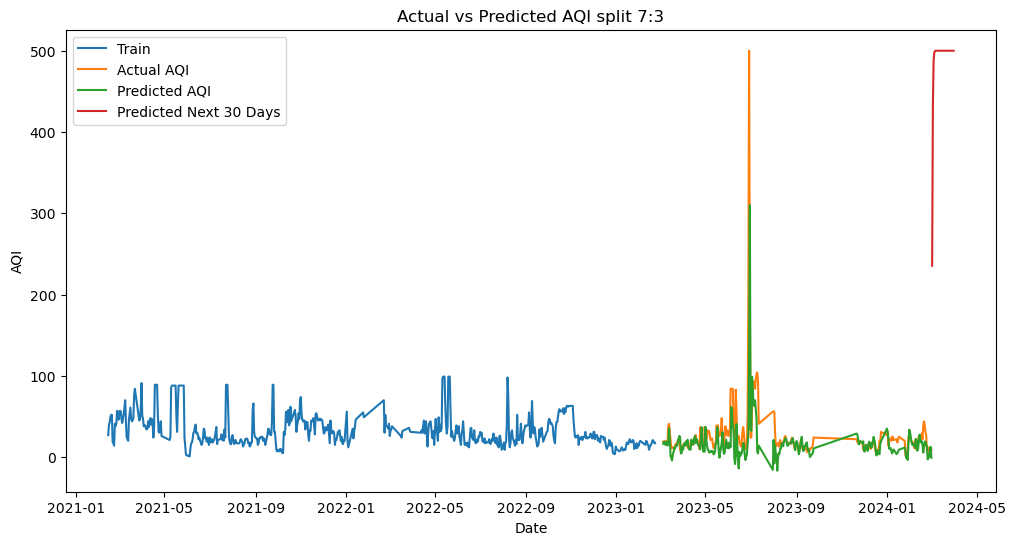

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013 - mae: 0.0265 - val_loss: 0.0112 - val_mae: 0.0615
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015 - mae: 0.0284 - val_loss: 0.0094 - val_mae: 0.0486
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - mae: 0.0261 - val_loss: 0.0098 - val_mae: 0.0487
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - mae: 0.0249 - val_loss: 0.0111 - val_mae: 0.0585
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014 - mae: 0.0274 - val_loss: 0.0114 - val_mae: 0.0616
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - mae: 0.0257 - val_loss: 0.0094 - val_mae: 0.0468
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013 - mae: 0.0254 - val_loss: 0.0112 - val_mae: 0.0638
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015 - mae: 0.0300 - val_loss: 0.0100 - val_mae: 0.0523
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014 - mae: 

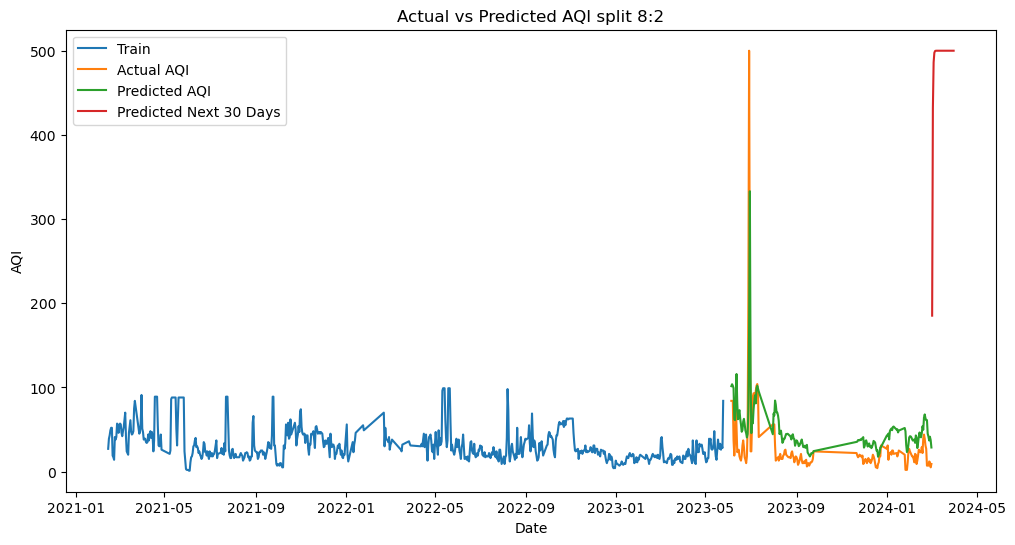

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mae: 0.0331 - val_loss: 0.0042 - val_mae: 0.0497
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mae: 0.0342 - val_loss: 0.0055 - val_mae: 0.0572
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0021 - mae: 0.0273 - val_loss: 0.0036 - val_mae: 0.0493
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0030 - mae: 0.0366 - val_loss: 0.0109 - val_mae: 0.0864
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0047 - mae: 0.0388 - val_loss: 0.0065 - val_mae: 0.0691
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mae: 0.0363 - val_loss: 0.0049 - val_mae: 0.0579
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mae: 0.0321 - val_loss: 0.0021 - val_mae: 0.0359
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mae: 0.0336 - val_loss: 0.0029 - val_mae: 0.0461
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mae: 

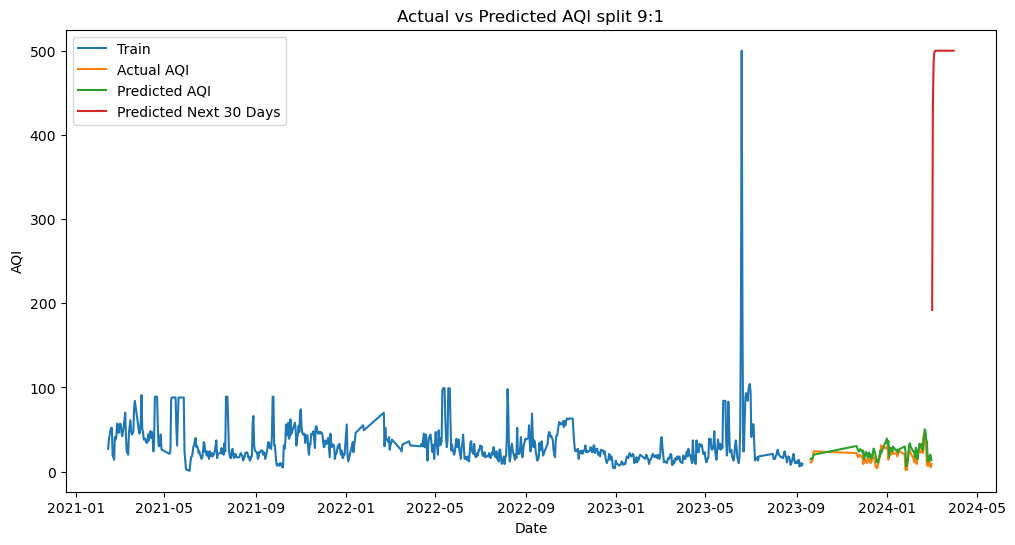

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Assuming df, model, scaler, X_train, y_train, X_test, y_test, and timesteps are already defined
def custom_round(number):
    if number >= 0:
        return int(number + 0.5)  # Làm tròn lên
    else:
        return int(number - 0.5)  # Làm tròn xuống
train_sizes = [0.7, 0.8, 0.9]
for train_size_ratio in train_sizes:
    # Split data into training and testing sets
    train_size = int(len(X) * train_size_ratio)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    # Reshape data to match model input
    X_train = np.reshape(X_train, (X_train.shape[0], timesteps, 1))
    X_test = np.reshape(X_test, (X_test.shape[0], timesteps, 1))
    
    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Inverse transform the predictions and true values
    y_pred_inverse = scaler.inverse_transform(y_pred[:, -1, 0].reshape(-1, 1))
    y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))
    y_train_inverse = scaler.inverse_transform(y_train.reshape(-1, 1))
    
    # Calculate error metrics
    rmse = np.sqrt(mean_squared_error(y_test_inverse, y_pred_inverse))
    mae = mean_absolute_error(y_test_inverse, y_pred_inverse)
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'Mean Absolute Error (MAE): {mae}')
    
    # Extend the index by 30 days
    last_index = df.index[-1]
    
    if isinstance(df.index, pd.DatetimeIndex):
        new_index = pd.date_range(start=last_index, periods=31, freq='D')[1:]
    elif isinstance(df.index, pd.RangeIndex):
        new_index = pd.RangeIndex(start=last_index + 1, stop=last_index + 31, step=1)
    
    
    # Create an array of 30 consecutive integers starting from the last index
    if isinstance(df.index, pd.DatetimeIndex):
        x_next_30_days = np.array(range(1, 31)).reshape(-1, 1)
    elif isinstance(df.index, pd.RangeIndex):
        x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)
    
    # Predict the AQI for the next 30 days
    y_next_30_days = model.predict(x_next_30_days)
    y_next_30_days_flat = scaler.inverse_transform(y_next_30_days[:, -1, 0].reshape(-1, 1)).flatten()
    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(df.index[:len(y_train_inverse)], y_train_inverse, label='Train')
    plt.plot(df.index[-len(y_test_inverse):], y_test_inverse, label='Actual AQI')
    plt.plot(df.index[-len(y_test_inverse):], y_pred_inverse, label='Predicted AQI')
    plt.plot(new_index, y_next_30_days_flat, label='Predicted Next 30 Days')
    plt.xlabel('Date')
    plt.ylabel('AQI')
    plt.title(f'Actual vs Predicted AQI split {custom_round(train_size_ratio * 10)}:{custom_round((1-train_size_ratio)*10)}')
    plt.legend()
    plt.show()
